Learning Linear Regression with Pumpkin Pricing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [6]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

data = pd.DataFrame({
    'Month' : month,
    'DayofYear' : day_of_year,
    'Variety' : pumpkins['Variety'],
    'City' : pumpkins['City Name'],
    'Package' : pumpkins['Package'],
    'Low Price' : pumpkins['Low Price'],
    'High Price' : pumpkins['High Price'],
})

data.loc[data['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
data.loc[data['Package'].str.contains('1/2'), 'Price'] = price*2
data.loc[data['Package'].str.contains('1 1/2'), 'Price'] = price*1.5

data.head()

<ipython-input-6-b0419e0fc3ce>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayofYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


A scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

<Axes: xlabel='Month', ylabel='Price'>

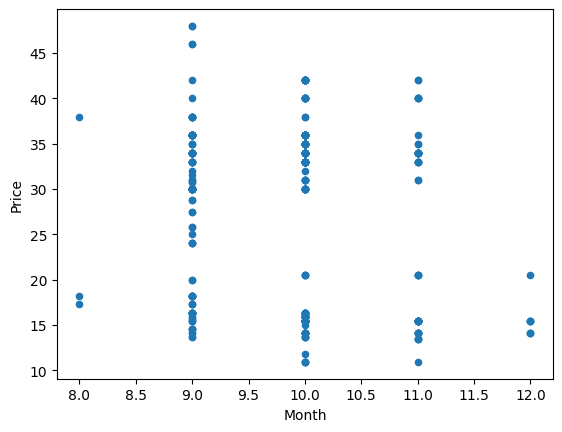

In [7]:
data.plot.scatter('Month','Price')

<Axes: xlabel='DayofYear', ylabel='Price'>

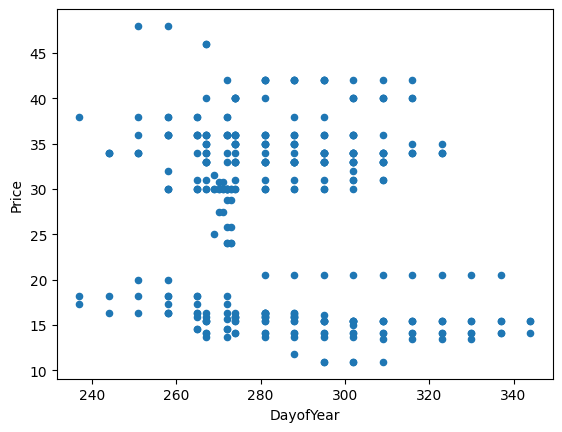

In [9]:
data.plot.scatter('DayofYear','Price')

Checking if there is correlation:

In [10]:
print(data['Month'].corr(data['Price']))
print(data['DayofYear'].corr(data['Price']))

-0.1527552179239466
-0.18091521663714052


Pretty small correlation exists

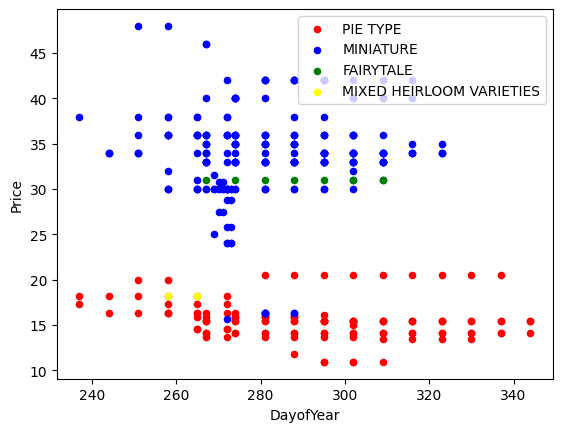

In [11]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(data['Variety'].unique()):
    ax = data[data['Variety']==var].plot.scatter('DayofYear','Price',ax=ax,c=colors[i],label=var)

<Axes: xlabel='Variety'>

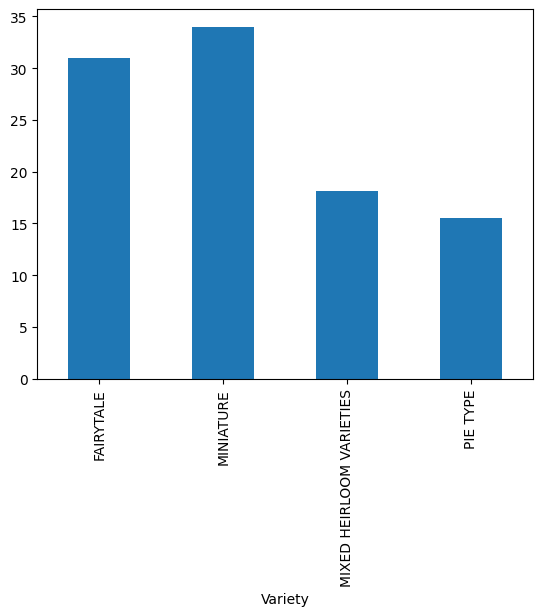

In [12]:
data.groupby('Variety')['Price'].mean().plot(kind='bar')

For the time being lets concentrating on the pie type varieties

-0.2143267184176787


<Axes: xlabel='DayofYear', ylabel='Price'>

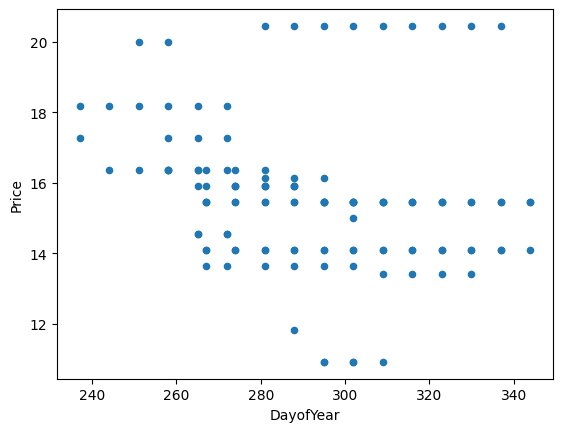

In [16]:
pie_pumpkins = data[data['Variety']=='PIE TYPE']
print(pie_pumpkins['DayofYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayofYear','Price')

**Linear Regression**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [26]:
pie_pumpkins = pie_pumpkins.dropna()

In [27]:
x1 = pie_pumpkins['DayofYear'].to_numpy().reshape(-1,1)
x1

array([[267],
       [267],
       [274],
       [274],
       [281],
       [281],
       [281],
       [281],
       [288],
       [288],
       [288],
       [295],
       [295],
       [295],
       [302],
       [302],
       [302],
       [258],
       [265],
       [265],
       [265],
       [272],
       [272],
       [309],
       [316],
       [323],
       [330],
       [267],
       [274],
       [281],
       [288],
       [295],
       [302],
       [309],
       [316],
       [323],
       [330],
       [337],
       [267],
       [274],
       [281],
       [288],
       [295],
       [302],
       [309],
       [316],
       [323],
       [330],
       [337],
       [344],
       [267],
       [267],
       [267],
       [274],
       [274],
       [274],
       [281],
       [281],
       [281],
       [288],
       [288],
       [288],
       [295],
       [295],
       [295],
       [302],
       [302],
       [302],
       [309],
       [309],
       [309],
      

In [28]:
y1 = pie_pumpkins['Price']
y1

,Price
70,13.636364
71,16.363636
72,16.363636
73,15.454545
74,13.636364
...,...
1626,10.909091
1627,10.909091
1628,17.272727
1629,16.363636


In [29]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.25 (14.5%)


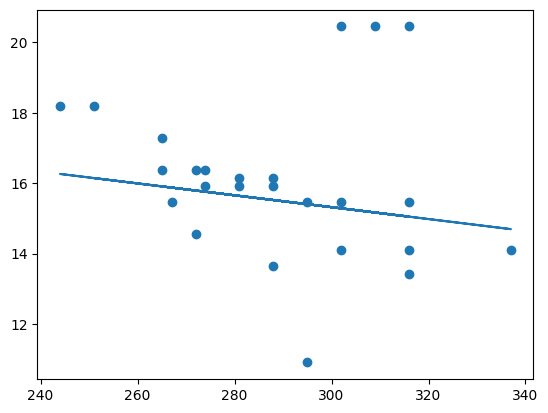

In [30]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [32]:
regressor.coef_, regressor.intercept_

(array([-0.01686612]), 20.380979573900273)

**Predicting Price**
Predicting the price of pumpkins using the trained model

In [33]:
# Pumpkin price on programmer's day

regressor.predict([[256]])

array([16.06325221])

**Polynomial Regression**

Mean error: 2.26 (14.7%)
Model determination:  0.1312360055317252


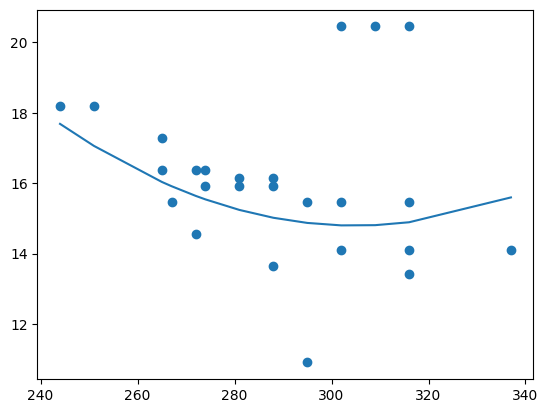

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

**Encoding Varieties**

In [35]:
pd.get_dummies(data['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,False,False,False,True
71,False,False,False,True
72,False,False,False,True
73,False,False,False,True
74,False,False,False,True
...,...,...,...,...
1738,False,True,False,False
1739,False,True,False,False
1740,False,True,False,False
1741,False,True,False,False


**Linear Regression on Variety**

In [38]:
data = data.dropna()

In [39]:
X = pd.get_dummies(data['Variety'])
y = data['Price']

In [40]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)

    pred = regressor.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = regressor.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 3.55 (13.2%)
Model determination:  0.7914071175983877


In [41]:
X = pd.get_dummies(data['Variety']) \
        .join(data['Month']) \
        .join(pd.get_dummies(data['City'])) \
        .join(pd.get_dummies(data['Package']))
y = data['Price']

run_linear_regression(X,y)

Mean error: 1.79 (6.7%)
Model determination:  0.9498994800467497


**Polynomial Regression on Variety**

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 3.39 (12.6%)
Model determination:  0.960572621271799
